**1. Import Necessary Libraries and Prepare Data ()**

C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -44.720
Date:                Fri, 06 Dec 2024   AIC                             99.440
Time:                        15:22:59   BIC                            104.162
Sample:                             0   HQIC                           100.239
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3023      0.581      2.240      0.025       0.163       2.442
ar.L2         -0.3042      0.591     -0.515      0.607      -1.462       0.853
ma.L1         -1.9377     18.112     -0.107      0.9

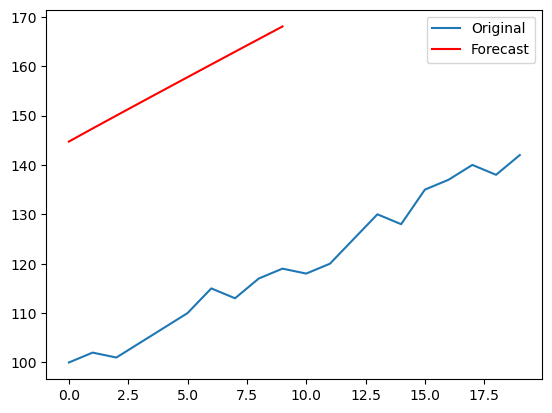

In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Sample time series data
data = {
    "Date": pd.date_range(start="2024-01-01", end="2024-01-20"),
    "Value": [100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 
              118, 120, 125, 130, 128, 135, 137, 140, 138, 142],
}

series = data['Value']

# Fit ARIMA model
model = ARIMA(series, order=(2, 1, 2))  # Example parameters (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=10)  # Predict the next 10 steps
print(forecast)

# Plot original data and forecast
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


**Holt’s Linear Trend Model ,Python Implementation**

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
series = [50, 52, 53, 54, 56, 57]  # Example data

# Fit model
model = ExponentialSmoothing(series, trend='add', seasonal=None)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=3)
print(forecast)

[58.46654772 59.83796369 61.20937966]


**Holt-Winters Seasonal Model:**

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
series = [50, 52, 53, 54, 56, 57]  # Example data

# Fit model
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=2)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=4)

print(forecast)

[58.50014193 59.83301665 61.25011869 62.58299341]


**Hands-on Time Series Forecasting**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
# Fabricated time series data
np.random.seed(42)

time_index = pd.date_range(start='2023-01-01', periods=60, freq='M')

trend = np.linspace(10, 20, 60)  # Linear trend

seasonality = 5 * np.sin(np.linspace(0, 3 * np.pi, 60))  # Seasonal pattern

noise = np.random.normal(0, 1, 60)  # Random noise


data = trend + seasonality + noise

C:\Users\ssing\AppData\Local\Temp\ipykernel_36016\52199205.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2023-01-01', periods=60, freq='M')


In [80]:
# Create a DataFrame
time_series_df = pd.DataFrame({'Date': time_index, 'Value': data})
time_series_df.set_index('Date', inplace=True)

In [82]:
time_series_df.head()

,Value
Date,
2023-01-31,10.496714
2023-02-28,10.826545
2023-03-31,12.557055
2023-04-30,14.336967
2023-05-31,13.425650


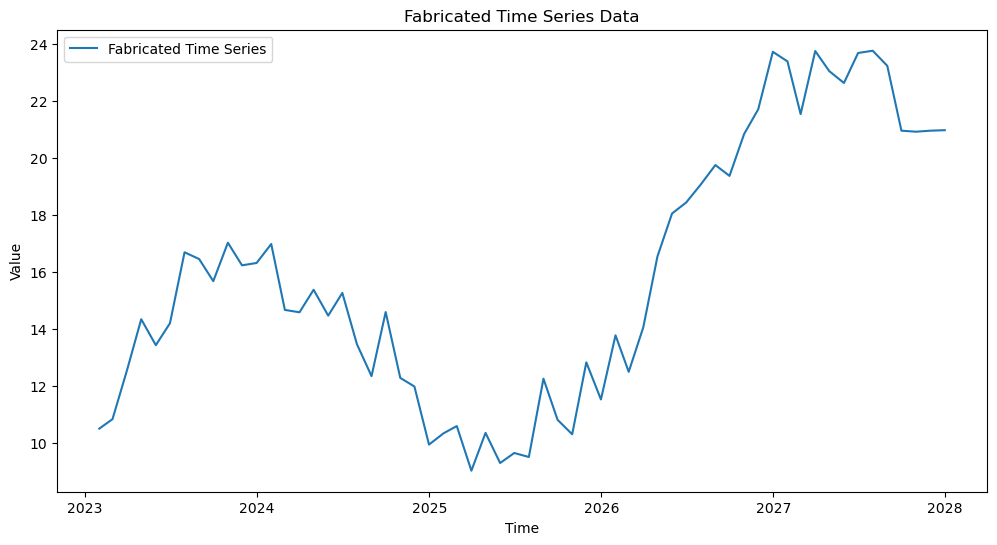

In [84]:
# Plot the fabricated data
plt.figure(figsize=(12, 6))
plt.plot(time_series_df, label='Fabricated Time Series')
plt.title('Fabricated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

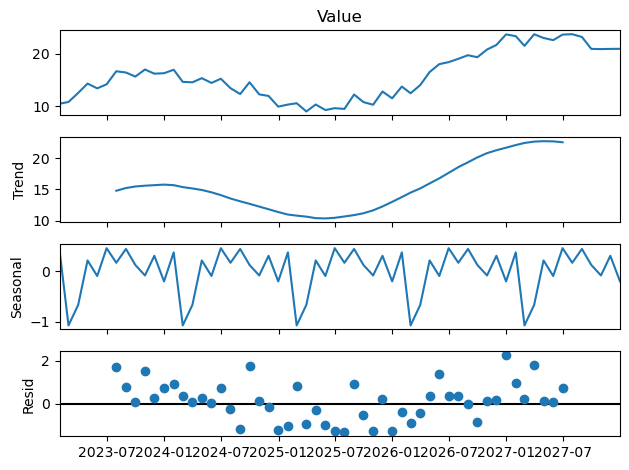

In [86]:
# Decomposition
decompose_result = seasonal_decompose(time_series_df['Value'], model='additive', period=12)

# Plot decomposition
decompose_result.plot()
plt.show()

In [88]:
# ARIMA model
# Differencing to achieve stationarity
time_series_diff = time_series_df['Value'].diff().dropna()

# Fitting ARIMA (1,1,1) for demonstration
arima_model = ARIMA(time_series_df['Value'], order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [90]:
# ARIMA forecast
arima_forecast = arima_result.forecast(steps=12)

# Simple Exponential Smoothing
ses_model = ExponentialSmoothing(time_series_df['Value'])
ses_fit = ses_model.fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_fit.forecast(steps=12)

C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [92]:
# Holt-Winters Model
hw_model = ExponentialSmoothing(time_series_df['Value'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=12)

# Combine forecasts for visualization
forecast_df = pd.DataFrame({
    'ARIMA Forecast': arima_forecast,
    'SES Forecast': ses_forecast,
    'HW Forecast': hw_forecast
})


C:\Users\ssing\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


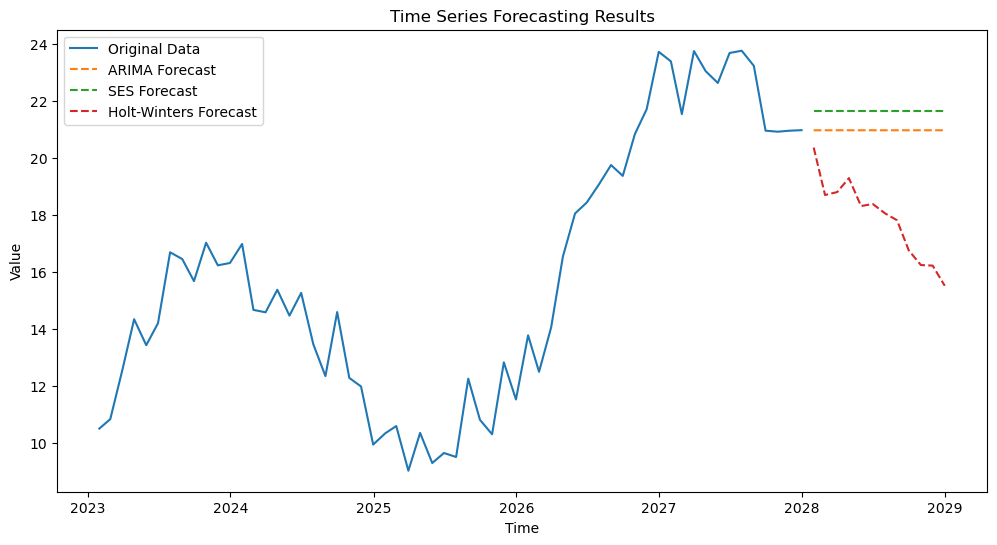

,ARIMA Forecast,SES Forecast,HW Forecast
2028-01-31,20.971903,21.65133,20.364803
2028-02-29,20.972680,21.65133,18.699599
2028-03-31,20.972514,21.65133,18.802174
2028-04-30,20.972550,21.65133,19.291269
2028-05-31,20.972542,21.65133,18.311716
2028-06-30,20.972544,21.65133,18.383286
2028-07-31,20.972543,21.65133,18.058021
2028-08-31,20.972543,21.65133,17.812591
2028-09-30,20.972543,21.65133,16.754856
2028-10-31,20.972543,21.65133,16.238968


In [94]:
# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(time_series_df, label='Original Data')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(ses_forecast, label='SES Forecast', linestyle='--')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Time Series Forecasting Results')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

forecast_df